In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('dataset.xlsx')
df = data.copy()

In [3]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Création des sous-ensembles 

In [4]:
missing_rate = df.isna().sum()/df.shape[0]

In [5]:
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 111, dtype: float64

In [6]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [7]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [8]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


## TrainTest - Nettoyage - Encodage

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [11]:
trainset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    4068
positive     447
Name: count, dtype: int64

In [12]:
testset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    1018
positive     111
Name: count, dtype: int64

### Encodage

In [35]:
def encodage(df):
    code = {'positive':1,
            'negative':0,
            'detected':1,
            'not_detected':0}
    
    for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)

    return df

In [36]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

In [33]:
def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #return df.fillna(-999)
    df = df.dropna(axis=0)
    return df

In [34]:
def preprocessing(df):
    df = encodage(df)
    feature_engineering(df)
    df = imputation(df)

    X = df.drop('SARS-Cov-2 exam result', axis=1)
    Y = df['SARS-Cov-2 exam result']

    print(Y.value_counts())

    return X, Y

In [37]:
X_train, Y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    258
1     38
Name: count, dtype: int64


In [38]:
X_test, Y_test = preprocessing(testset)

SARS-Cov-2 exam result
0    54
1    12
Name: count, dtype: int64


## Modelisation

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [40]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [41]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [42]:
list_of_models = [RandomForest, AdaBoost, SVM, KNN]

/opt/homebrew/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  48  51  56  57  58  62  64  83  88  94  96 114 119 125
 127 144 149 155 157 173 178 184 186 201 206 212 214 228 233 239 241 254
 259 265 267 279 284 290 292 303 308 314 316 326 331 337 339 348 353 359
 361 369 374 380 382 389 394 400 402 408 413 419 421 424 425 426 427 429
 430 431 433 434 435 436 437 438 439 442 443 444 445 446 447 448 449 451
 452 454 455 456 459 460 462 463 464 465 466 467 468 470 472 474 475 476
 477 478 479 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496
 497 498 499 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520
 521 522 523 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541
 542 543 544 545 546 547 548 550 551 552 553 554 555 556 559 560 561 562
 563 564 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586 587
 589 591 592] are constant.
  warnings.warn("Features %s are constant." % co

[[51  3]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.57      0.33      0.42        12

    accuracy                           0.83        66
   macro avg       0.72      0.64      0.66        66
weighted avg       0.81      0.83      0.82        66



/opt/homebrew/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 16  18  21  23  24  25  26  29  30  31  48  49  51  54  56  57  58  59
  62  63  64  81  83  86  88  89  90  91  94  95  96 112 114 117 119 120
 121 122 125 126 127 142 144 147 149 150 151 152 155 156 157 171 173 176
 178 179 180 181 184 185 186 199 201 204 206 207 208 209 212 213 214 226
 228 231 233 234 235 236 239 240 241 252 254 257 259 260 261 262 265 266
 267 277 279 282 284 285 286 287 290 291 292 301 303 306 308 309 310 311
 314 315 316 324 326 329 331 332 333 334 337 338 339 346 348 351 353 354
 355 356 359 360 361 367 369 372 374 375 376 377 380 381 382 387 389 392
 394 395 396 397 400 401 402 406 408 411 413 414 415 416 419 420 421 424
 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 441 442 443
 444 445 446 447 448 449 450 451 452 453 454 455 456 457 459 460 461 462
 463 464 465 466 467 468 469 470 471 472 474 475 476 477 478 479 480 481
 48

[[50  4]
 [ 9  3]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.88        54
           1       0.43      0.25      0.32        12

    accuracy                           0.80        66
   macro avg       0.64      0.59      0.60        66
weighted avg       0.77      0.80      0.78        66



/opt/homebrew/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  16  18  21  22  23  24  25  26  27  28  29  30  31  48  49  51  54
  55  56  57  58  59  60  61  62  63  64  80  81  83  86  87  88  89  90
  91  92  93  94  95  96 111 112 114 117 118 119 120 121 122 123 124 125
 126 127 141 142 144 147 148 149 150 151 152 153 154 155 156 157 170 171
 173 176 177 178 179 180 181 182 183 184 185 186 198 199 201 204 205 206
 207 208 209 210 211 212 213 214 225 226 228 231 232 233 234 235 236 237
 238 239 240 241 251 252 254 257 258 259 260 261 262 263 264 265 266 267
 276 277 279 282 283 284 285 286 287 288 289 290 291 292 300 301 303 306
 307 308 309 310 311 312 313 314 315 316 323 324 326 329 330 331 332 333
 334 335 336 337 338 339 345 346 348 351 352 353 354 355 356 357 358 359
 360 361 366 367 369 372 373 374 375 376 377 378 379 380 381 382 386 387
 389 392 393 394 395 396 397 398 399 400 401 402 405 406 408 411 412 413
 41

[[51  3]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.57      0.33      0.42        12

    accuracy                           0.83        66
   macro avg       0.72      0.64      0.66        66
weighted avg       0.81      0.83      0.82        66



/opt/homebrew/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  48  51  56  57  58  62  64  83  88  94  96 114 119 125
 127 144 149 155 157 173 178 184 186 201 206 212 214 228 233 239 241 254
 259 265 267 279 284 290 292 303 308 314 316 326 331 337 339 348 353 359
 361 369 374 380 382 389 394 400 402 408 413 419 421 424 425 426 427 429
 430 431 433 434 435 436 437 438 439 442 443 444 445 446 447 448 449 451
 452 453 454 455 456 459 460 462 463 464 465 466 467 468 470 472 474 475
 476 477 478 479 480 481 482 483 484 485 486 487 488 490 491 493 494 495
 496 497 498 499 500 501 504 505 506 508 509 511 512 513 514 517 518 519
 520 521 522 523 524 525 526 529 530 531 532 533 534 535 536 537 539 540
 541 542 543 544 545 546 547 548 550 551 552 553 554 555 556 559 560 561
 562 563 564 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586
 587 589 591 592] are constant.
  warnings.warn("Features %s are constant." 

[[49  5]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        54
           1       0.44      0.33      0.38        12

    accuracy                           0.80        66
   macro avg       0.65      0.62      0.63        66
weighted avg       0.78      0.80      0.79        66



/opt/homebrew/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 16  18  23  25  29  31  48  49  51  56  57  58  62  64  81  83  88  90
  94  96 112 114 119 121 125 127 142 144 149 151 155 157 171 173 178 180
 184 186 199 201 206 208 212 214 226 228 233 235 239 241 252 254 259 261
 265 267 277 279 284 286 290 292 301 303 308 310 314 316 324 326 331 333
 337 339 346 348 353 355 359 361 367 369 374 376 380 382 387 389 394 396
 400 402 406 408 413 415 419 421 424 425 426 427 429 430 431 433 434 435
 436 437 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 459 460 461 462 463 464 465 466 467 468 469 470 471 472 474
 475 476 477 478 479 480 481 482 483 484 485 486 487 488 490 491 492 493
 494 495 496 497 498 499 500 501 504 505 506 508 509 511 512 513 514 517
 518 519 520 521 522 523 524 525 526 529 530 531 532 533 534 535 536 537
 539 540 541 542 543 544 545 546 547 548 550 551 552 553 554 555 556 558
 55

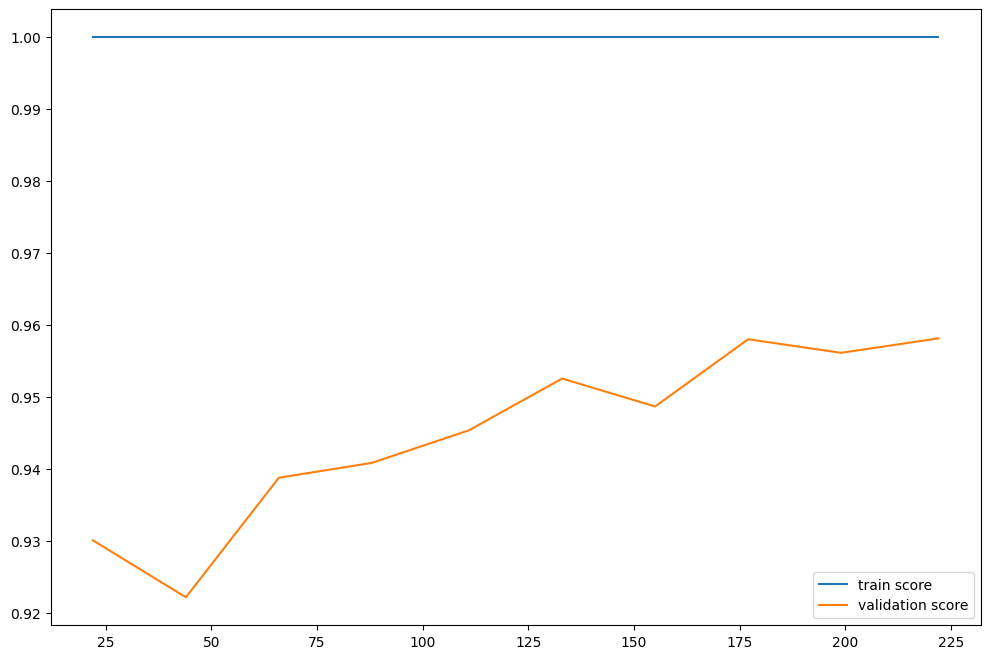

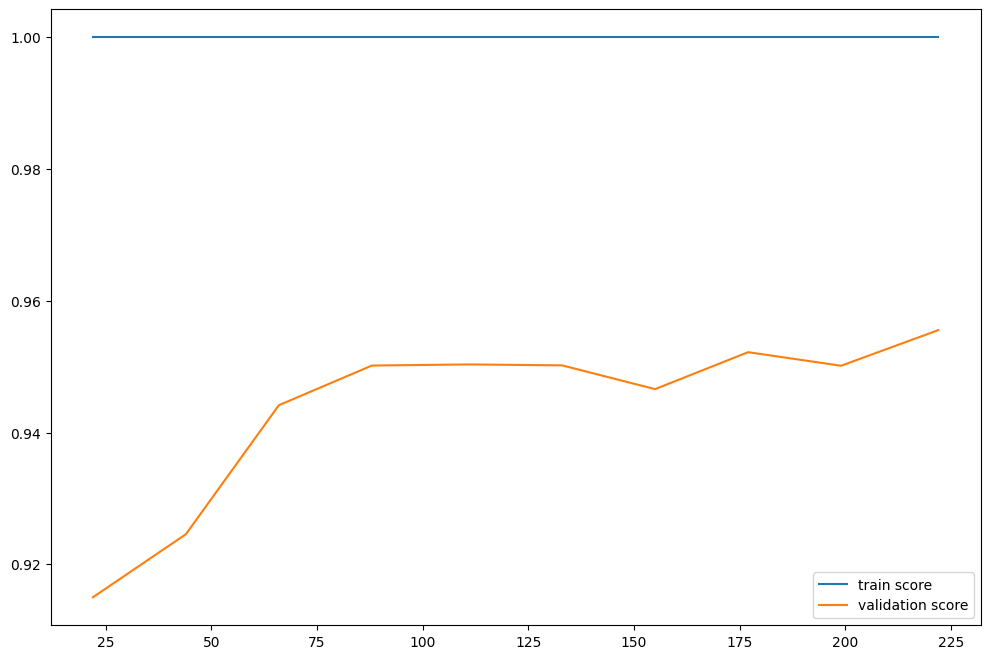

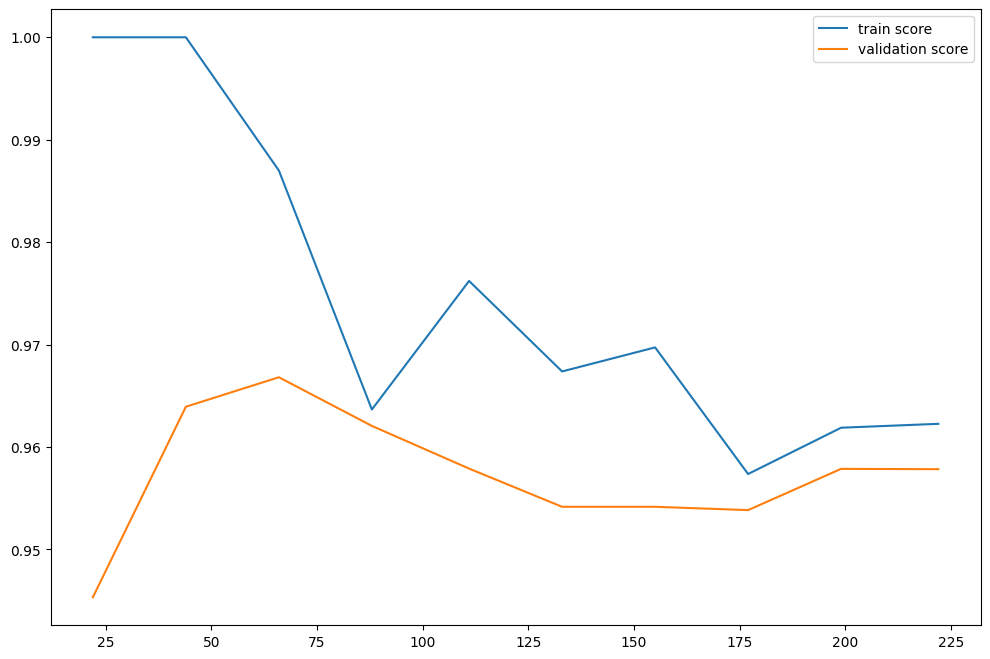

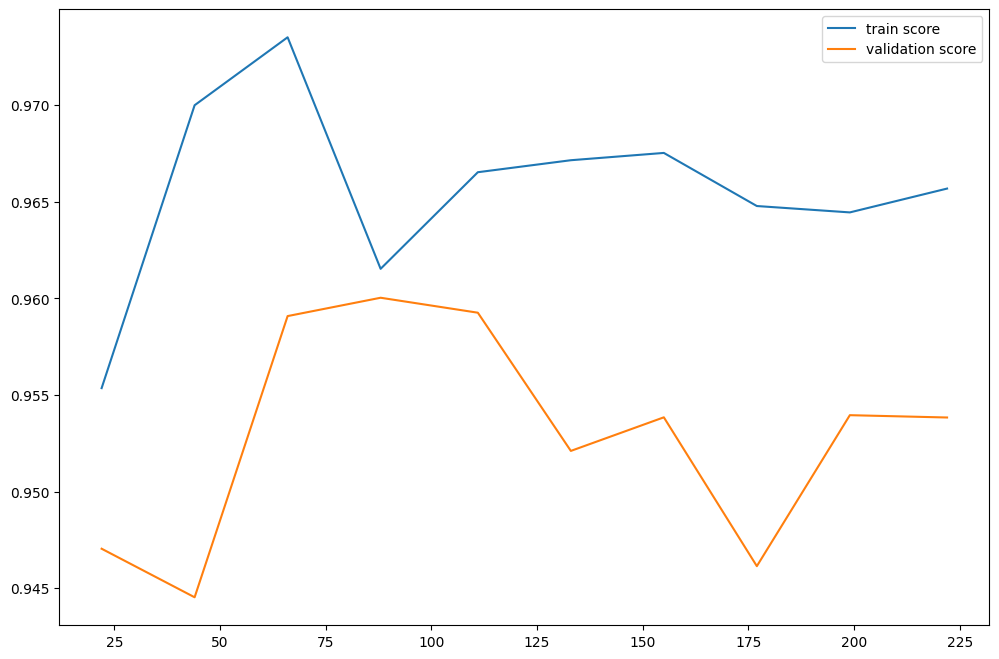

In [43]:
for model in list_of_models:
    evaluation(model)

## Procédure d'évaluation

In [29]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, make_scorer, f1_score
from sklearn.model_selection import learning_curve

In [30]:
def evaluation(model):
    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)

    print(confusion_matrix(Y_test, ypred))
    print(classification_report(Y_test, ypred))

    f1_scorer = make_scorer(f1_score, pos_label=Y_train.unique()[0])
    N, train_score, val_score = learning_curve(model, X_train, Y_train, cv=4, scoring=f1_scorer, train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

/opt/homebrew/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  48  51  56  57  58  62  64  83  88  94  96 114 119 125
 127 144 149 155 157 173 178 184 186 201 206 212 214 228 233 239 241 254
 259 265 267 279 284 290 292 303 308 314 316 326 331 337 339 348 353 359
 361 369 374 380 382 389 394 400 402 408 413 419 421 424 425 426 427 429
 430 431 433 434 435 436 437 438 439 442 443 444 445 446 447 448 449 451
 452 454 455 456 459 460 462 463 464 465 466 467 468 470 472 474 475 476
 477 478 479 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496
 497 498 499 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520
 521 522 523 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541
 542 543 544 545 546 547 548 550 551 552 553 554 555 556 559 560 561 562
 563 564 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586 587
 589 591 592] are constant.
  warnings.warn("Features %s are constant." % co

[[49  5]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        54
           1       0.44      0.33      0.38        12

    accuracy                           0.80        66
   macro avg       0.65      0.62      0.63        66
weighted avg       0.78      0.80      0.79        66



/opt/homebrew/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  48  51  56  57  58  62  64  83  88  94  96 114 119 125
 127 144 149 155 157 173 178 184 186 201 206 212 214 228 233 239 241 254
 259 265 267 279 284 290 292 303 308 314 316 326 331 337 339 348 353 359
 361 369 374 380 382 389 394 400 402 408 413 419 421 424 425 426 427 429
 430 431 433 434 435 436 437 438 439 442 443 444 445 446 447 448 449 451
 452 453 454 455 456 459 460 462 463 464 465 466 467 468 470 472 474 475
 476 477 478 479 480 481 482 483 484 485 486 487 488 490 491 493 494 495
 496 497 498 499 500 501 504 505 506 508 509 511 512 513 514 517 518 519
 520 521 522 523 524 525 526 529 530 531 532 533 534 535 536 537 539 540
 541 542 543 544 545 546 547 548 550 551 552 553 554 555 556 559 560 561
 562 563 564 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586
 587 589 591 592] are constant.
  warnings.warn("Features %s are constant." 

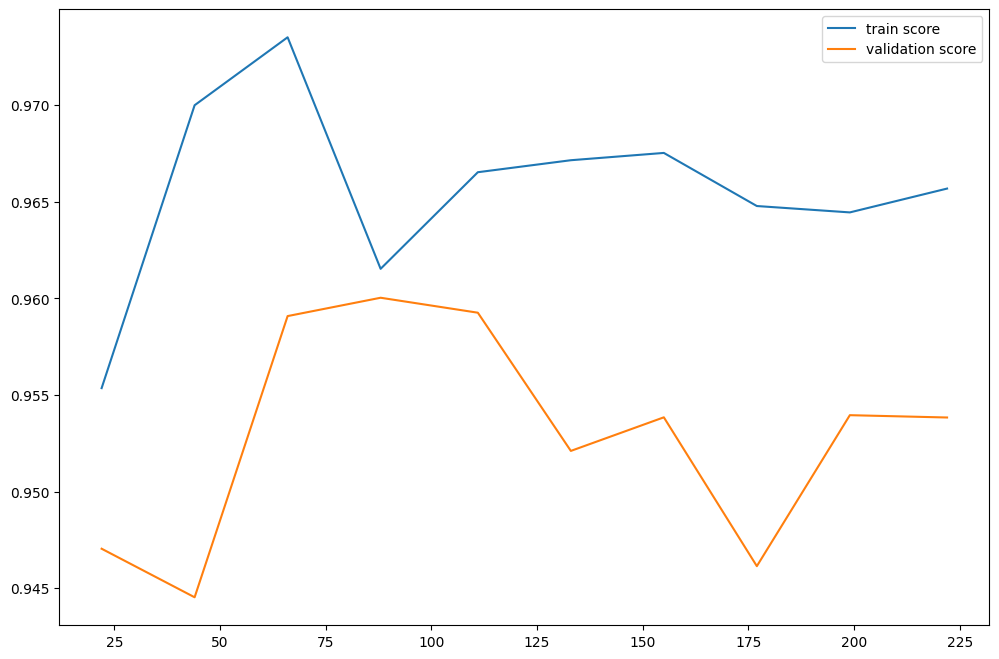

In [31]:
evaluation(model)

In [32]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar()

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'